<h1><span style="color: #8b0000;">Rain Prediction Project </span> </h1>

## Importing dataset and features handling

In [1]:
#Importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('C:/Users/DELL/Desktop/Second Project/sydney_rain prediction.xlsx')

In [3]:
df.head(6)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes


In [4]:
# Checking if there is one or more type of Location
df.Location.unique()

array(['Sydney'], dtype=object)

#### -------------------------------------------------------------------------------------------

<h3><span style="color: #ff4500;">Feature Engineering</span> </h3>

In [5]:
# Dropping unecessary column
df=df.drop(axis=0,columns=['Date','Location'])

In [6]:
# Treating Null values
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [7]:
# Treating categorical data with dummy boolean value
df=pd.get_dummies(df,columns=['RainToday','RainTomorrow'],drop_first=True,dtype=int)

#### -------------------------------------------------------------------------------------------

<h2><span style="color: #ff4500;">Final Data </span> </h2>

In [8]:
df.head(6)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
5,20.2,27.2,1.6,2.600000,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1


#### Count of all features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

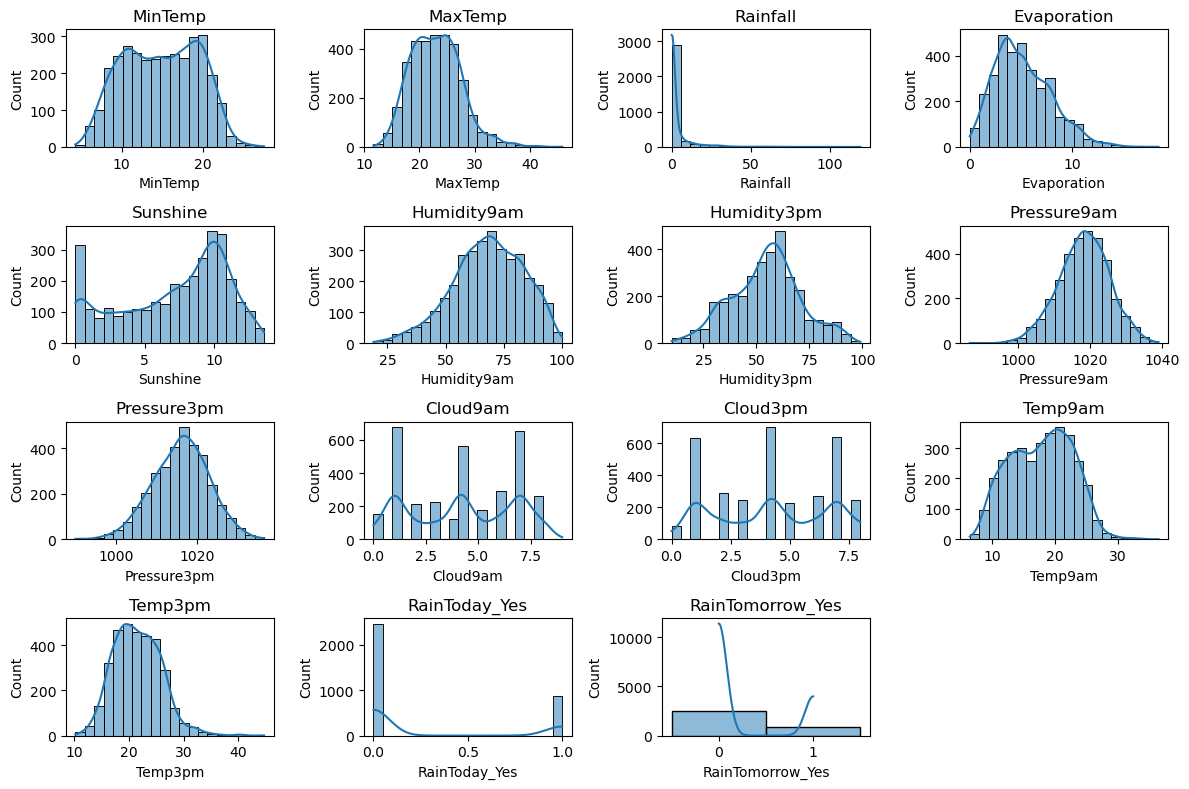

In [104]:
# All Features count distribution
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    if df[col].dtype != 'object':
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(col)
plt.tight_layout()
plt.show()


#### -------------------------------------------------------------------------------------------

<h2><span style="color: #ff4500;"> EDA (Exploratory Data Analysis)</span> </h2>

### 1. Distribution of Max Temperature

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


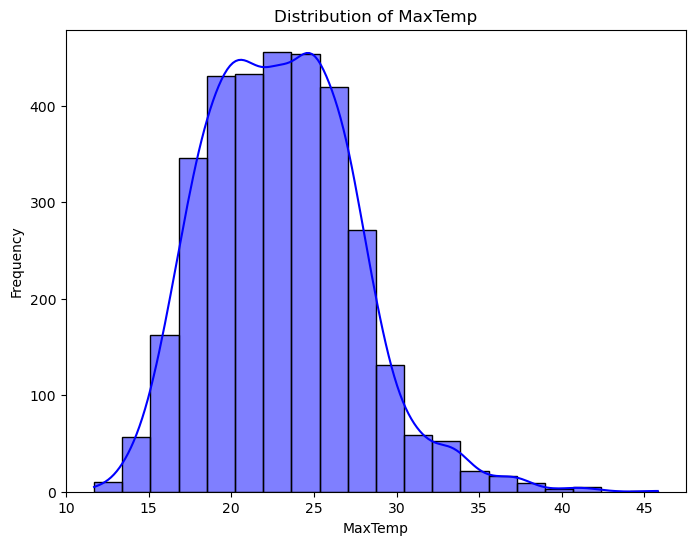

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['MaxTemp'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()


### 2. Scatter plot on MinTemp vs MaxTemp

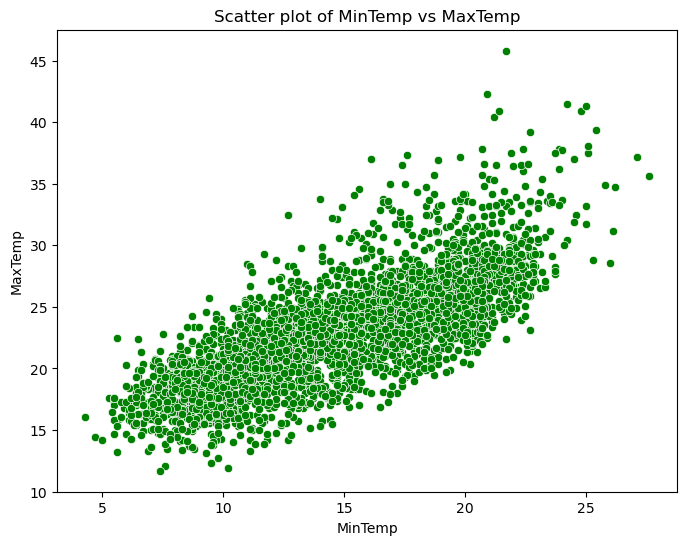

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df, color='green')
plt.title('Scatter plot of MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()


### 3. Box plot of Max Temp by Rain Tomorrow

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


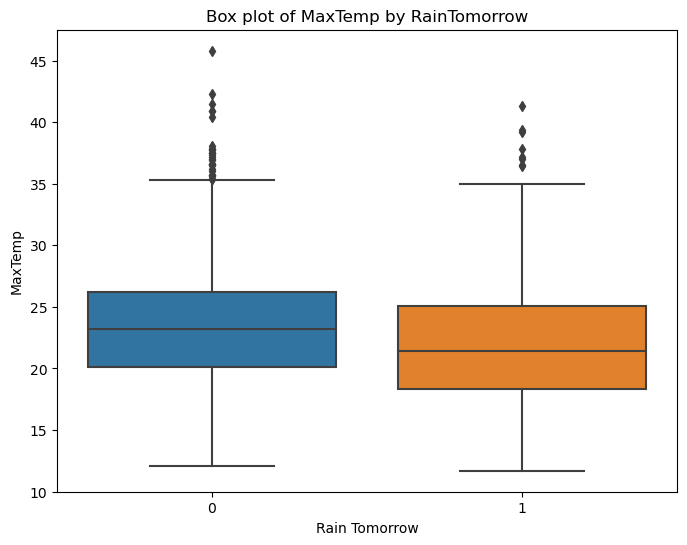

In [102]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow_Yes', y='MaxTemp', data=df)
plt.title('Box plot of MaxTemp by RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('MaxTemp')
plt.show()



### 4. Correlation Heatmap of Selected Variables

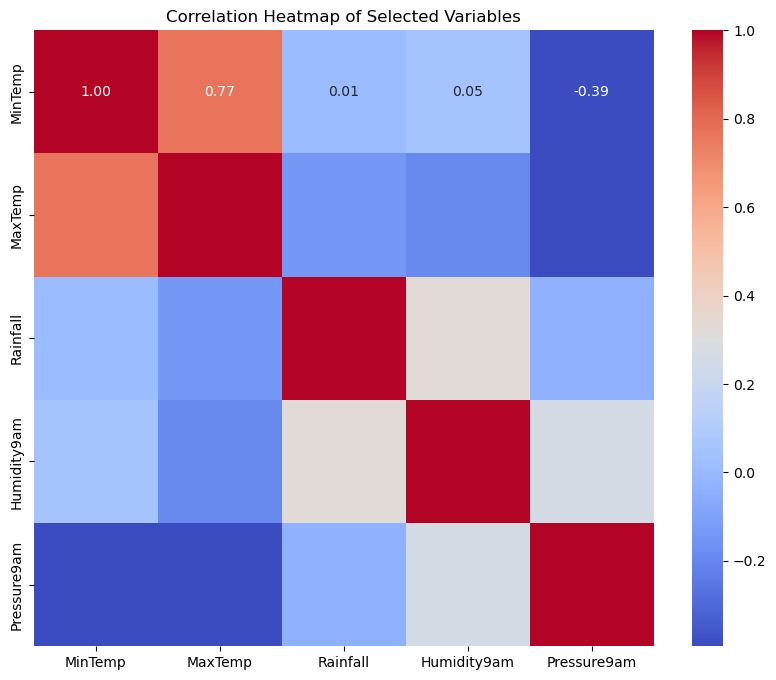

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Pressure9am']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


### 5. Temperature Variation (9am vs 3pm)

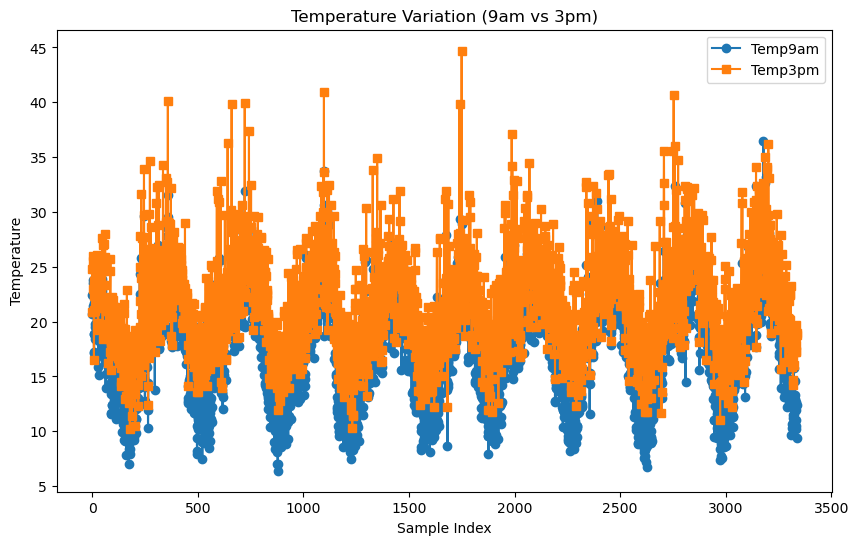

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(df['Temp9am'], label='Temp9am', marker='o')
plt.plot(df['Temp3pm'], label='Temp3pm', marker='s')
plt.title('Temperature Variation (9am vs 3pm)')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#### -------------------------------------------------------------------------------------------

### Correleation Matrix

In [15]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770701,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.139837,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.012866,-0.139837,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.143491,0.555015,0.293808
Evaporation,0.567623,0.509060,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,0.325107,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.003210,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.242049,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


### Heat map plotting

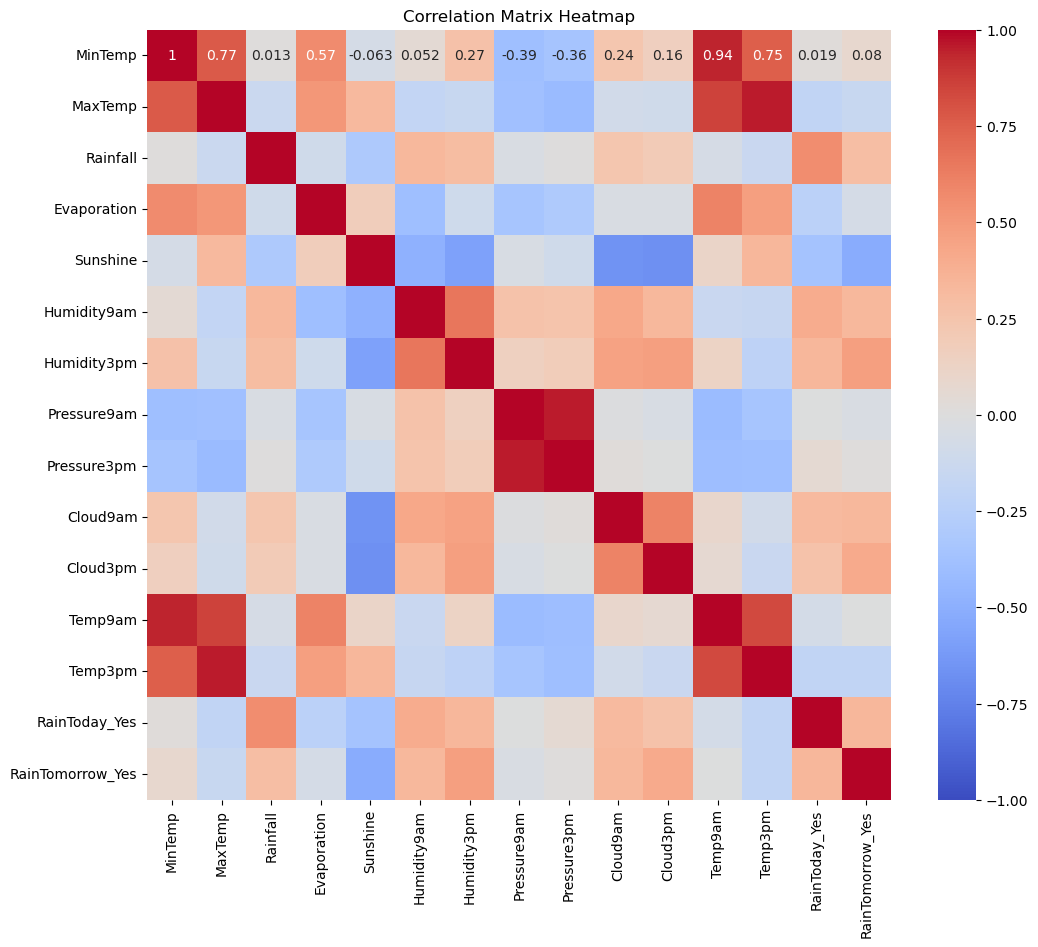

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm', vmin=-1, vmax=1,annot_kws={"size":10})
plt.title('Correlation Matrix Heatmap')
plt.show()


#### -------------------------------------------------------------------------------------------

<h2><span style="color: #00ced1;">Splitting Data into (X) independent variables and (y) dependent variable</span> </h2>

In [17]:
X=df.loc[:,df.columns!='RainTomorrow_Yes']
y=df['RainTomorrow_Yes']

In [18]:
X.head(6),X.shape

(   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
 0     19.5     22.4      15.6     6.200000       0.0         92.0   
 1     19.5     25.6       6.0     3.400000       2.7         83.0   
 2     21.6     24.5       6.6     2.400000       0.1         88.0   
 3     20.2     22.8      18.8     2.200000       0.0         83.0   
 4     19.7     25.7      77.4     5.187432       0.0         88.0   
 5     20.2     27.2       1.6     2.600000       8.6         69.0   
 
    Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
 0         84.0       1017.6       1017.4       8.0       8.0     20.7   
 1         73.0       1017.9       1016.4       7.0       7.0     22.4   
 2         86.0       1016.7       1015.6       7.0       8.0     23.5   
 3         90.0       1014.2       1011.8       8.0       8.0     21.4   
 4         74.0       1008.3       1004.8       8.0       8.0     22.5   
 5         62.0       1002.7        998.6       6.0       6.0   

In [19]:
y.head(6),y.shape

(0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 Name: RainTomorrow_Yes, dtype: int32,
 (3337,))

#### -------------------------------------------------------------------------------------------

<h2><span style="color: #00ced1;">Let's Do Modelling To find best fit model to predict Salary for our dataset</span> </h2>

### Common Models for Rain-Prediction we gonna use here
1. Logistic Regression
2. Decision Trees
3. Bagging
4. Random Forests
6. K-Nearest Neighbors (k-NN)
7. XG Boost
8. Grid Search for Hypertuning

<h3><span style="color: #00008b;">Train-Test-Split of Data</span> </h3>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<h3><span style="color: #00008b;">Importing Evaluations Libraries</span> </h3>

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

#### -------------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;">1. LOGISTIC REGRESSION</span> </h3>

#### On test data

In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print(classification_report(y_test, y_pred))

Logistic Regression Model:
Accuracy: 0.8223552894211577
Precision: 0.765625
Recall: 0.525
F1 Score: 0.6228813559322035
Confusion Matrix:
[[677  45]
 [133 147]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       722
           1       0.77      0.53      0.62       280

    accuracy                           0.82      1002
   macro avg       0.80      0.73      0.75      1002
weighted avg       0.82      0.82      0.81      1002



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### On trained data

In [59]:
# Test the model
lr.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = lr.predict(X_train)

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print("Logistic Regression Model on Training Data:")
print(f"Accuracy train: {accuracy_train}")
print(f"Precision train: {precision_train}")
print(f"Recall train: {recall_train}")
print(f"F1 Score train: {f1_train}")
print(f"Confusion Matrix train:\n{conf_matrix_train}")

# Classification report on training data
print("Over train data:\n", classification_report(y_train, y_pred_train))

Logistic Regression Model on Training Data:
Accuracy train: 0.8359743040685225
Precision train: 0.8278306717831162
Recall train: 0.8359743040685225
F1 Score train: 0.8276350003936765
Confusion Matrix train:
[[1631  119]
 [ 264  321]]
Over train data:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1750
           1       0.73      0.55      0.63       585

    accuracy                           0.84      2335
   macro avg       0.80      0.74      0.76      2335
weighted avg       0.83      0.84      0.83      2335



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### -------------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;">2. DECISION TREE</span> </h3>

#### On test data

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


# Classification report (includes precision, recall, f1-score, support)
print(classification_report(y_test, y_pred))


Decision Tree Model:
Accuracy: 0.7485029940119761
Precision: 0.5492957746478874
Recall: 0.5571428571428572
F1 Score: 0.5531914893617021
Confusion Matrix:
[[594 128]
 [124 156]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       722
           1       0.77      0.53      0.62       280

    accuracy                           0.82      1002
   macro avg       0.80      0.73      0.75      1002
weighted avg       0.82      0.82      0.81      1002



#### On trained data

In [63]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train = clf.predict(X_train)

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print("Decision Tree Model on Training Data:")
print(f"Accuracy train: {accuracy_train}")
print(f"Precision train: {precision_train}")
print(f"Recall train: {recall_train}")
print(f"F1 Score train: {f1_train}")
print(f"Confusion Matrix train:\n{conf_matrix_train}")

# Classification report on training data
print("Over train data:\n", classification_report(y_train, y_pred_train))

Decision Tree Model on Training Data:
Accuracy train: 1.0
Precision train: 1.0
Recall train: 1.0
F1 Score train: 1.0
Confusion Matrix train:
[[1750    0]
 [   0  585]]
Over train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00       585

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335



#### -------------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;">3. BAGGING</span> </h3>

#### Over test data

In [47]:
from sklearn.ensemble import BaggingClassifier

# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
clf = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Test the classifier
clf.fit(X_train,y_train)

# Predict on the test and train set
y_pred_bag = clf.predict(X_test)

# Evaluate the model
#Test model
accuracy = accuracy_score(y_test, y_pred_bag)
precision = precision_score(y_test, y_pred_bag)
recall = recall_score(y_test, y_pred_bag)
f1 = f1_score(y_test, y_pred_bag)
conf_matrix = confusion_matrix(y_test, y_pred_bag)

print("Bagging Model:")
print(f"Accuracy test: {accuracy} ")
print(f"Precision test: {precision} ")
print(f"Recall test: {recall}")
print(f"F1 Score test: {f1}  ")
print(f"Confusion Matrix test:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print("Over test data:\n",classification_report(y_test, y_pred_bag))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model:
Accuracy test: 0.8203592814371258 
Precision test: 0.7551020408163265 
Recall test: 0.5285714285714286
F1 Score test: 0.6218487394957983  
Confusion Matrix test:
[[674  48]
 [132 148]]
Over test data:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       722
           1       0.76      0.53      0.62       280

    accuracy                           0.82      1002
   macro avg       0.80      0.73      0.75      1002
weighted avg       0.81      0.82      0.81      1002



#### Over trained data

In [64]:
# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
clf = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the training set
y_pred_bag_train = clf.predict(X_train)

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_bag_train)
precision_train = precision_score(y_train, y_pred_bag_train)
recall_train = recall_score(y_train, y_pred_bag_train)
f1_train = f1_score(y_train, y_pred_bag_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_bag_train)

print("Bagging Model on Training Data:")
print(f"Accuracy train: {accuracy_train}")
print(f"Precision train: {precision_train}")
print(f"Recall train: {recall_train}")
print(f"F1 Score train: {f1_train}")
print(f"Confusion Matrix train:\n{conf_matrix_train}")

# Classification report on training data
print("Over train data:\n", classification_report(y_train, y_pred_bag_train))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model on Training Data:
Accuracy train: 1.0
Precision train: 1.0
Recall train: 1.0
F1 Score train: 1.0
Confusion Matrix train:
[[1750    0]
 [   0  585]]
Over train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00       585

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335



#### -------------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;">4. RANDOM FOREST</span> </h3>

#### Over Test Data

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = clf.predict(X_test)

# Evaluate the test model 
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy test: {accuracy} ")
print(f"Precision test: {precision} ")
print(f"Recall test: {recall}")
print(f"F1 Score test: {f1}  ")
print(f"Confusion Matrix test:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print("Over test data:\n",classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy test: 0.8233532934131736 
Precision test: 0.7696335078534031 
Recall test: 0.525
F1 Score test: 0.624203821656051  
Confusion Matrix test:
[[678  44]
 [133 147]]
Over test data:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       722
           1       0.77      0.53      0.62       280

    accuracy                           0.82      1002
   macro avg       0.80      0.73      0.75      1002
weighted avg       0.82      0.82      0.81      1002



#### Over trained data

In [65]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_pred_rf_train = clf.predict(X_train)

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_rf_train)
precision_train = precision_score(y_train, y_pred_rf_train)
recall_train = recall_score(y_train, y_pred_rf_train)
f1_train = f1_score(y_train, y_pred_rf_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_rf_train)

print("Random Forest on Training Data:")
print(f"Accuracy train: {accuracy_train}")
print(f"Precision train: {precision_train}")
print(f"Recall train: {recall_train}")
print(f"F1 Score train: {f1_train}")
print(f"Confusion Matrix train:\n{conf_matrix_train}")

# Classification report on training data
print("Over train data:\n", classification_report(y_train, y_pred_rf_train))

Random Forest on Training Data:
Accuracy train: 1.0
Precision train: 1.0
Recall train: 1.0
F1 Score train: 1.0
Confusion Matrix train:
[[1750    0]
 [   0  585]]
Over train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00       585

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335



#### -------------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;">5. K-NN</span> </h3>

#### On test data

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("K-NN Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print(classification_report(y_test, y_pred))


K-NN Model:
Accuracy: 0.7904191616766467
Precision: 0.6732673267326733
Recall: 0.4857142857142857
F1 Score: 0.5643153526970955
Confusion Matrix:
[[656  66]
 [144 136]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       722
           1       0.77      0.53      0.62       280

    accuracy                           0.82      1002
   macro avg       0.80      0.73      0.75      1002
weighted avg       0.82      0.82      0.81      1002



#### On trained data

In [74]:
# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train = clf.predict(X_train)

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print("K-NN Model on Training Data:")
print(f"Accuracy train: {accuracy_train}")
print(f"Precision train: {precision_train}")
print(f"Recall train: {recall_train}")
print(f"F1 Score train: {f1_train}")
print(f"Confusion Matrix train:\n{conf_matrix_train}")

# Classification report on training data
print("Over train data:\n", classification_report(y_train, y_pred_train))

K-NN Model on Training Data:
Accuracy train: 0.8680942184154176
Precision train: 0.8641702646929662
Recall train: 0.8680942184154176
F1 Score train: 0.8611056566594254
Confusion Matrix train:
[[1671   79]
 [ 229  356]]
Over train data:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1750
           1       0.82      0.61      0.70       585

    accuracy                           0.87      2335
   macro avg       0.85      0.78      0.81      2335
weighted avg       0.86      0.87      0.86      2335



#### -------------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;">6. XG BOOST</span> </h3>

#### On test data

In [29]:
from xgboost import XGBClassifier

# Create XGBoost classifier
clf = XGBClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xg)
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)
conf_matrix = confusion_matrix(y_test, y_pred_xg)

print("XG Boost Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print(classification_report(y_test, y_pred_xg))


XG Boost Model:
Accuracy: 0.8183632734530938
Precision: 0.7247706422018348
Recall: 0.5642857142857143
F1 Score: 0.6345381526104417
Confusion Matrix:
[[662  60]
 [122 158]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       722
           1       0.72      0.56      0.63       280

    accuracy                           0.82      1002
   macro avg       0.78      0.74      0.76      1002
weighted avg       0.81      0.82      0.81      1002



#### On trained data

In [77]:
# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train = clf.predict(X_train)

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print("K-NN Model on Training Data:")
print(f"Accuracy train: {accuracy_train}")
print(f"Precision train: {precision_train}")
print(f"Recall train: {recall_train}")
print(f"F1 Score train: {f1_train}")
print(f"Confusion Matrix train:\n{conf_matrix_train}")

# Classification report on training data
print("Over train data:\n", classification_report(y_train, y_pred_train))

K-NN Model on Training Data:
Accuracy train: 0.8680942184154176
Precision train: 0.8641702646929662
Recall train: 0.8680942184154176
F1 Score train: 0.8611056566594254
Confusion Matrix train:
[[1671   79]
 [ 229  356]]
Over train data:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1750
           1       0.82      0.61      0.70       585

    accuracy                           0.87      2335
   macro avg       0.85      0.78      0.81      2335
weighted avg       0.86      0.87      0.86      2335



#### -------------------------------------------------------------------------------------

<h3><span style="color: #b8860b;"> GRID SEARCH FOR HYPEERTUNING</span> </h3>

### Hypertuning on Random Forest

#### On test data and train

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Random Forest Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print(classification_report(y_test, y_pred))

best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)

# Evaluate performance on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print("Best Random Forest Model on Training Data:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print(f"Confusion Matrix:\n{conf_matrix_train}")

# Classification report (includes precision, recall, f1-score, support)
print("Classification Report on Training Data:")
print(classification_report(y_train, y_pred_train))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Random Forest Model:
Accuracy: 0.8273453093812375
Precision: 0.786096256684492
Recall: 0.525
F1 Score: 0.6295503211991436
Confusion Matrix:
[[682  40]
 [133 147]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       722
           1       0.79      0.53      0.63       280

    accuracy                           0.83      1002
   macro avg       0.81      0.73      0.76      1002
weighted avg       0.82      0.83      0.82      1002

Best Random Forest Model on Training Data:
Accuracy: 0.9443254817987152
Precision: 0.9690721649484536
Recall: 0.8034188034188035
F1 Score: 0.8785046728971964
Confusion Matrix:
[[1735   15]
 [ 115  470]]
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1750
           1       0.97      0.80      0.88       585

    accuracy                           0.94      2335
   macro avg       0.95      0.90      0.92 

#### -------------------------------------------------------------------------------------------

### Hypertuning in Decision Tree

#### On test data and train data

In [117]:
from sklearn.model_selection import GridSearchCV

# Define the classifier (Decision Tree in this example)
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Grid Search CV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit Grid Search CV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)
print()

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_gd = best_model.predict(X_test)
y_pred_gd_train=best_model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gd)
precision = precision_score(y_test, y_pred_gd)
recall = recall_score(y_test, y_pred_gd)
f1 = f1_score(y_test, y_pred_gd)
conf_matrix = confusion_matrix(y_test, y_pred_gd)

print("Grid Search on Decision Tree Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report (includes precision, recall, f1-score, support)
print(classification_report(y_test, y_pred))


# Evaluate performance on training data
accuracy_train = accuracy_score(y_train, y_pred_gd_train)
precision_train = precision_score(y_train, y_pred_gd_train)
recall_train = recall_score(y_train, y_pred_gd_train)
f1_train = f1_score(y_train, y_pred_gd_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_gd_train)

print("Grid Search  on Decision Tree Training Data:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print(f"Confusion Matrix:\n{conf_matrix_train}")

# Classification report (includes precision, recall, f1-score, support)
print("Classification Report on Training Data:")
print(classification_report(y_train, y_pred_gd_train))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Grid Search on Decision Tree Model:
Accuracy: 0.7754491017964071
Precision: 0.6150627615062761
Recall: 0.525
F1 Score: 0.5664739884393064
Confusion Matrix:
[[630  92]
 [133 147]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       722
           1       0.79      0.53      0.63       280

    accuracy                           0.83      1002
   macro avg       0.81      0.73      0.76      1002
weighted avg       0.82      0.83      0.82      1002

Grid Search  on Decision Tree Training Data:
Accuracy: 0.908779443254818
Precision: 0.872
Recall: 0.7452991452991453
F1 Score: 0.8036866359447005
Confusion Matrix:
[[1686   64]
 [ 149  436]]
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.92      0.96 

#### <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>

# Q.1- Your views about the problem statement?

Predicting rainfall using machine learning is aproblem statement that can have significant implications across various sectors,including agriculture, disaster management, urban planning, and water resource management. 

### Importance and Relevance
1. Agriculture: Accurate rainfall prediction can help farmers make informed decision about planting, irrigation and harvesting. It can lead to better crop yield management and reduce the risk of crop failure due to unexpected weather change.
2. Disaster Management: Timely predictions of heavy rainfall can help in disaster preparedness and response, reducing the impact of floods and landslides.Authorities can issue warnings and take preventive measures to protect lives and property.
3. Water Resource Management: Better rainfall forecasting can improve the management of reservoirs, dams, and water supply systems.It helps in optimizing the allocation of water resources during different seasons.

### Conclusion 
Predicting rainfalls has several benefits in daily humankind and making this model and showing accurate prediction will definetly make the company "The Daily Buzz" stand out in the market.

# Q.2- What will be your approach to solving this task?

Approach to Create a Machine Learning Model for Salary Prediction
1. Data Collection : Gather historical data on erainfall along with relevant features that might influence rain probability.
2. Data Preprocessing: Cleaning the Data >> Feature Engineering >> Encoding >> Normalization.
3. Feature Selection : Feature selection is the process of selecting a subset of relevant and significant features (variables) from the original dataset to be used as inputs to a machine learning model. The goal is to improve the model’s performance by eliminating redundant or irrelevant features, thereby enhancing the model’s accuracy, efficiency, and interpretability.
4. Model Selection : Choosing suitable regression model according to the type of data and others matrices in our data. For eg: Different model has different accuracy score,precision,Recall and F1 score also the confusion matrix which is important to judge how our model is perfofrming and on the basis of that we can know which model is performing better than other.
5. Model Evaluation: Evaluate model performance on the testing set using metrics like accuracy score, precision,recall, f1 score and confusion matrix.

# Q.3- What were the available ML model options you had to perform this task?

 Some Common Models which are available  for Rain-Prediction we gonna use here are
1. Logistic Regression
2. Decision Trees
3. Bagging
4. Random Forests
5. GridSearch
6. K-Nearest Neighbors (k-NN)
7. XG Boost

# Q.4- . Which model’s performance is best and what could be the possible reason for that?

To compare the performance of different models based on the metrics provided (Accuracy, Precision, Recall, F1 Score), let's analyze each model's results and also figure out the pros and cons of model.
1. Logistic Regression:
* Pros: Simple model, interpretable coefficients.
* Cons: Assumes linear relationship, may not capture complex interactions in data.
2. Decision Tree:
* Pros: Non-linear relationships, can handle complex interactions.
* Cons: Prone to overfitting without regularization.
3. Bagging (Ensemble of Decision Trees):
* Pros: Reduces variance, improves stability.
* Cons: May still overfit if base learners (Decision Trees) are overfitting.
4. Random Forest:
* Pros: Further reduces overfitting compared to single Decision Tree.
* Cons: Computationally expensive, harder to interpret than a single Decision Tree.
5. K-Nearest Neighbors (K-NN):
* Pros: Non-parametric, captures local patterns well.
* Cons: Sensitive to irrelevant features and distance metric choice, computationally expensive at inference time.
6. XGBoost:
* Pros: Often provides state-of-the-art performance, handles missing data, and balances class weights.
* Cons: Requires careful tuning of hyperparameters, potentially slower training than simpler models.

### Summary and Recommendation:
#### Best Performing Model: 
Based on the provided metrics, the Random Forest model after hyperparameter tuning appears to perform the best on the test data with an F1 score of 0.624. It also shows no signs of overfitting on the training data, maintaining perfect scores across metrics.


# Q.5- What steps can you take to improve this selected model’s performance even further?

To improve this selected model's performance further:
1. Increase Data: More data can improve model performance because it provides the model with more examples to learn from
2. Feature Engineering: Removing reduntant or irrelevant ones and retain with most relevant features.
3. Addressing Overfitting and Underfitting
4. Hyperparameters Tuning: Use technique like GridSearchCV and other method find the best parameters for your model.